# <center>"Bank Loan Status Dataset"</center>
### <center>Source: https://www.kaggle.com/zaurbegiev/my-dataset</center>
#### <center>Zaur Begiev, 2017-04-08<center>


<img src="piggy-3612928_1280.jpg">

>This loan data contains 100,000 rows and 18 columns of data for customers with Fully Paid and Charged Off Loans. It also includes Credit Scores, Annual Income, Bankruptcies and Credit History. I will clean, analyze and use data to train a random forest classification algorithm to predict customer Charged Off and Fully Paid loans.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
dataset1 = pd.read_csv('credit_train.csv')
dataset = pd.read_csv('credit_train.csv')

In [2]:
#first look at part of the data
dataset.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Dependant variable: 
- Loan Status

### Independant categorical variables: 
- Term 
- Home Ownership
- Purpose

### Independant numerical variables:
- Current Loan Amount
- Credit Score
- Annual Income
- Years in Current Job
- Monthly Debt
- Years of Credit History
- Months since last delinquent
- Number of Open Accounts
- Number of Credit Problems
- Current Credit Balance
- Maximum Open Credit
- Bankruptcies
- Tax Liens

### Irrelevant variables: 
- Loan ID 
- Customer ID

## Problems with dataset
- "**Loan ID**" and "**Customer ID**" columns value hold no value
- categorical variables need to be converted into numerical data for algorithms to work
- _99999999.0_ recurring value in "**Current Loan Amount**" column
- _NaN_ or "missing" values
- Symbols such as "_+_" and "_<_" in "**Years in Current Job**" column

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

### dataset.info()
> The data has 100,000 rows and 16 columns excluding "**Loan ID**" and "**Customer ID**", several columns have a lot of missing values (denoted by non-null in this description or _NaN_ within the dataset) especially "**Months since last delinquent**" either due to customer not providing information or there not being a value for a certain customer such as in the aformentioned column where a customer simply has never been, or is currently, delinquent.

### The troublesome "**Current Loan Amount**" column
> If you refer back to the problems with dataset one of these problems is the "_99999999.0_" value for one row, I suspect this value has the same value as NaN

In [4]:
dataset['Current Loan Amount'].value_counts()

99999999.0    11484
223322.0         27
223102.0         27
223652.0         27
216194.0         27
108966.0         26
222596.0         26
214962.0         25
216810.0         25
179828.0         25
110374.0         24
222266.0         24
173492.0         24
177452.0         24
215358.0         24
218702.0         24
219648.0         23
216546.0         23
216920.0         23
220550.0         23
217668.0         23
223432.0         23
174372.0         23
270226.0         22
156332.0         22
217558.0         22
262680.0         22
180268.0         22
222112.0         22
129052.0         22
              ...  
497354.0          1
553454.0          1
497332.0          1
228360.0          1
661760.0          1
201916.0          1
684134.0          1
473066.0          1
577280.0          1
733370.0          1
561572.0          1
574904.0          1
342034.0          1
601304.0          1
432190.0          1
497706.0          1
62370.0           1
684156.0          1
497574.0          1


> This data confirms my suspicious about the strange "_99999999.0_" value. Since there are only 11484 rows with this value and is only 11.4 percent of our data we will only get rid of the rows with this value instead of the whole column.

In [5]:
#getting rid of those strange values in our dataset
dataset= dataset[dataset['Current Loan Amount'] != 99999999.0 ]

## Missing Values

In [29]:
def Train_missing_values(training_dataset):
    Missing_Data_Percent=pd.DataFrame(training_dataset.isna().sum())
    Missing_Data_Percent.reset_index(inplace=True)
    Missing_Data_Percent.columns=['Field_Name','Missing_value_count']
    Missing_Data_Percent['Percent_missing_values']=Missing_Data_Percent['Missing_value_count'].\
                                                apply(lambda Missing_value_count:(Missing_value_count/len(training_dataset))*100)
    return Missing_Data_Percent.sort_values(['Percent_missing_values'],ascending=False)
Train_missing_values(dataset1)

,Field_Name,Missing_value_count,Percent_missing_values
12,Months since last delinquent,53655,53.380624
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
17,Bankruptcies,718,0.714328
18,Tax Liens,524,0.521320
16,Maximum Open Credit,516,0.513361
11,Years of Credit History,514,0.511372
15,Current Credit Balance,514,0.511372
14,Number of Credit Problems,514,0.511372


### Trouble in 'Months since last delinquent' town
> This whole column is an issue, it's missing "_NaN_" values take up a whopping 53.38% of the column with no way of substituting the values for something meaningful that will not completely warp the rest of our data. In cases like this one can delete every row containing the NaN value or simply not using the column, I will do the latter. To preserve the maximum amount of data.
### The NaN issue
> After taking care of the "**Months since last delinquent**' column there will still be the issue of all of the other missing values in the other columns, thankfully the most troublesome of these rows has NaN values that only take up 30% of our data. 30% is still a significant hit to our data but the current amount of values will put too much stress on my local machine and so it will give a big sigh of relief once the algorithms start churning.

### Next steps
> In the following slice of code I will get rid of all NaN values, split the dataset into X and Y as well as drop the meaningless and troublesome columns

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89030 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         88516 non-null object
Customer ID                     88516 non-null object
Loan Status                     88516 non-null object
Current Loan Amount             88516 non-null float64
Term                            88516 non-null object
Credit Score                    69362 non-null float64
Annual Income                   69362 non-null float64
Years in current job            84722 non-null object
Home Ownership                  88516 non-null object
Purpose                         88516 non-null object
Monthly Debt                    88516 non-null float64
Years of Credit History         88516 non-null float64
Months since last delinquent    41728 non-null float64
Number of Open Accounts         88516 non-null float64
Number of Credit Problems       88516 non-null float64
Current Credit Balance          88516 non-null float64
Maximum Open Cred

In [8]:
#dropping useless columns
dataset = dataset.drop(['Loan ID','Customer ID','Months since last delinquent'], axis=1)

In [9]:
#our new dataset
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0


In [10]:
#dropping null values
dataset = dataset.dropna()

In [11]:
#setting the dependant variable
Y=  dataset.iloc[:,0:1]

In [12]:
Y.head()

,Loan Status
0,Fully Paid
3,Fully Paid
5,Charged Off
6,Fully Paid
8,Fully Paid


In [13]:
y=dataset['Loan Status']
y.ravel()

array(['Fully Paid', 'Fully Paid', 'Charged Off', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

Fully Paid:  50028
Charged Off:  16214


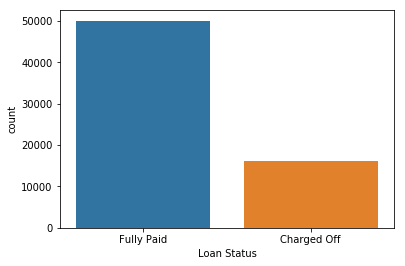

In [14]:
ax = sns.countplot(y,label="Count")
F, C = y.value_counts()
print('Fully Paid: ',F)
print('Charged Off: ',C)

>It looks like 75% of customers manage to get their loans Fully Paid

In [15]:
#dropping Y variable from X
X=  dataset.drop(['Loan Status'], axis=1)
#getting rid of unecessary symbols in column
X['Years in current job'] = X['Years in current job'].map(lambda x: x.lstrip('<> ').rstrip(' +years'))

In [16]:
#new and improved X
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
3,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,206602.0,Short Term,7290.0,896857.0,10,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,217646.0,Short Term,730.0,1184194.0,1,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,548746.0,Short Term,678.0,2559110.0,2,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [17]:
#splitting initial data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
#making sure we got rid of any inconsistencies and null values in data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52993 entries, 32178 to 65830
Data columns (total 15 columns):
Current Loan Amount          52993 non-null float64
Term                         52993 non-null object
Credit Score                 52993 non-null float64
Annual Income                52993 non-null float64
Years in current job         52993 non-null object
Home Ownership               52993 non-null object
Purpose                      52993 non-null object
Monthly Debt                 52993 non-null float64
Years of Credit History      52993 non-null float64
Number of Open Accounts      52993 non-null float64
Number of Credit Problems    52993 non-null float64
Current Credit Balance       52993 non-null float64
Maximum Open Credit          52993 non-null float64
Bankruptcies                 52993 non-null float64
Tax Liens                    52993 non-null float64
dtypes: float64(11), object(4)
memory usage: 6.5+ MB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13249 entries, 18506 to 70468
Data columns (total 15 columns):
Current Loan Amount          13249 non-null float64
Term                         13249 non-null object
Credit Score                 13249 non-null float64
Annual Income                13249 non-null float64
Years in current job         13249 non-null object
Home Ownership               13249 non-null object
Purpose                      13249 non-null object
Monthly Debt                 13249 non-null float64
Years of Credit History      13249 non-null float64
Number of Open Accounts      13249 non-null float64
Number of Credit Problems    13249 non-null float64
Current Credit Balance       13249 non-null float64
Maximum Open Credit          13249 non-null float64
Bankruptcies                 13249 non-null float64
Tax Liens                    13249 non-null float64
dtypes: float64(11), object(4)
memory usage: 1.6+ MB


> essentially what this piece of code has done is to split the data in 3/4, taking that 1/4 and using it as a method of testing how accurate the algorithm will be

### Categorical Variables
> Now that the data is sufficiently clean all that there is left to do is to deal with the categorical features within the data. Algorithms need logic to function and the english language is the antithesis of logic, I will be using LabelEncoder from the sklearn.preprocessing library to solve this issue. 

In [20]:
#encoding y_train
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train.ravel())

C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#encoding y_test
y_test = labelencoder_y.fit_transform(y_test)
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test.ravel())

C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#encoding y_test
y_test = labelencoder_y.fit_transform(y_test)
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test.ravel())

In [23]:
#checking to see if Y_train was properly encoded
y_train

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [24]:
#checking to see if Y_test was properly encoded
y_test

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
#Setting variable for heat map use
X_train_corr = X_train.apply(LabelEncoder().fit_transform)

In [26]:
#getting dummy variables for 2 columns 'Home Ownership', 'Purpose'. 'Term' already in desired form
#we must also get rid of one dummy variable column for each categorical column to avoid dummy variable trap
X_train = pd.get_dummies(X_train, columns = ['Term', 'Home Ownership', 'Purpose'], drop_first='true')
X_test = pd.get_dummies(X_test, columns = ['Term', 'Home Ownership', 'Purpose'], drop_first='true')


In [27]:
#checking to see normalized features
X_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
count,52993.000000,52993.000000,5.299300e+04,52993.000000,52993.000000,52993.000000,52993.000000,5.299300e+04,5.299300e+04,52993.000000,...,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000,52993.000000
mean,318399.411583,1126.791388,1.395953e+06,18866.817379,17.958640,11.222973,0.164361,2.966118e+05,7.475998e+05,0.113317,...,0.010926,0.031702,0.006020,0.003472,0.001472,0.062574,0.000113,0.003038,0.000962,0.000981
std,188438.828152,1571.066344,1.155630e+06,12336.043790,6.793728,5.061830,0.482960,3.576748e+05,8.337057e+06,0.343936,...,0.103956,0.175208,0.077353,0.058823,0.038337,0.242198,0.010640,0.055036,0.031008,0.031310
min,15422.000000,585.000000,7.662700e+04,0.000000,3.900000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174592.000000,704.000000,8.607380e+05,10565.520000,13.300000,8.000000,0.000000,1.145320e+05,2.718320e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,270600.000000,722.000000,1.198406e+06,16595.360000,16.800000,10.000000,0.000000,2.132940e+05,4.656740e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,436964.000000,740.000000,1.673577e+06,24416.140000,21.500000,14.000000,0.000000,3.718870e+05,7.786460e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,65.000000,76.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <center>Correlation Heat Map between independant variables<center>

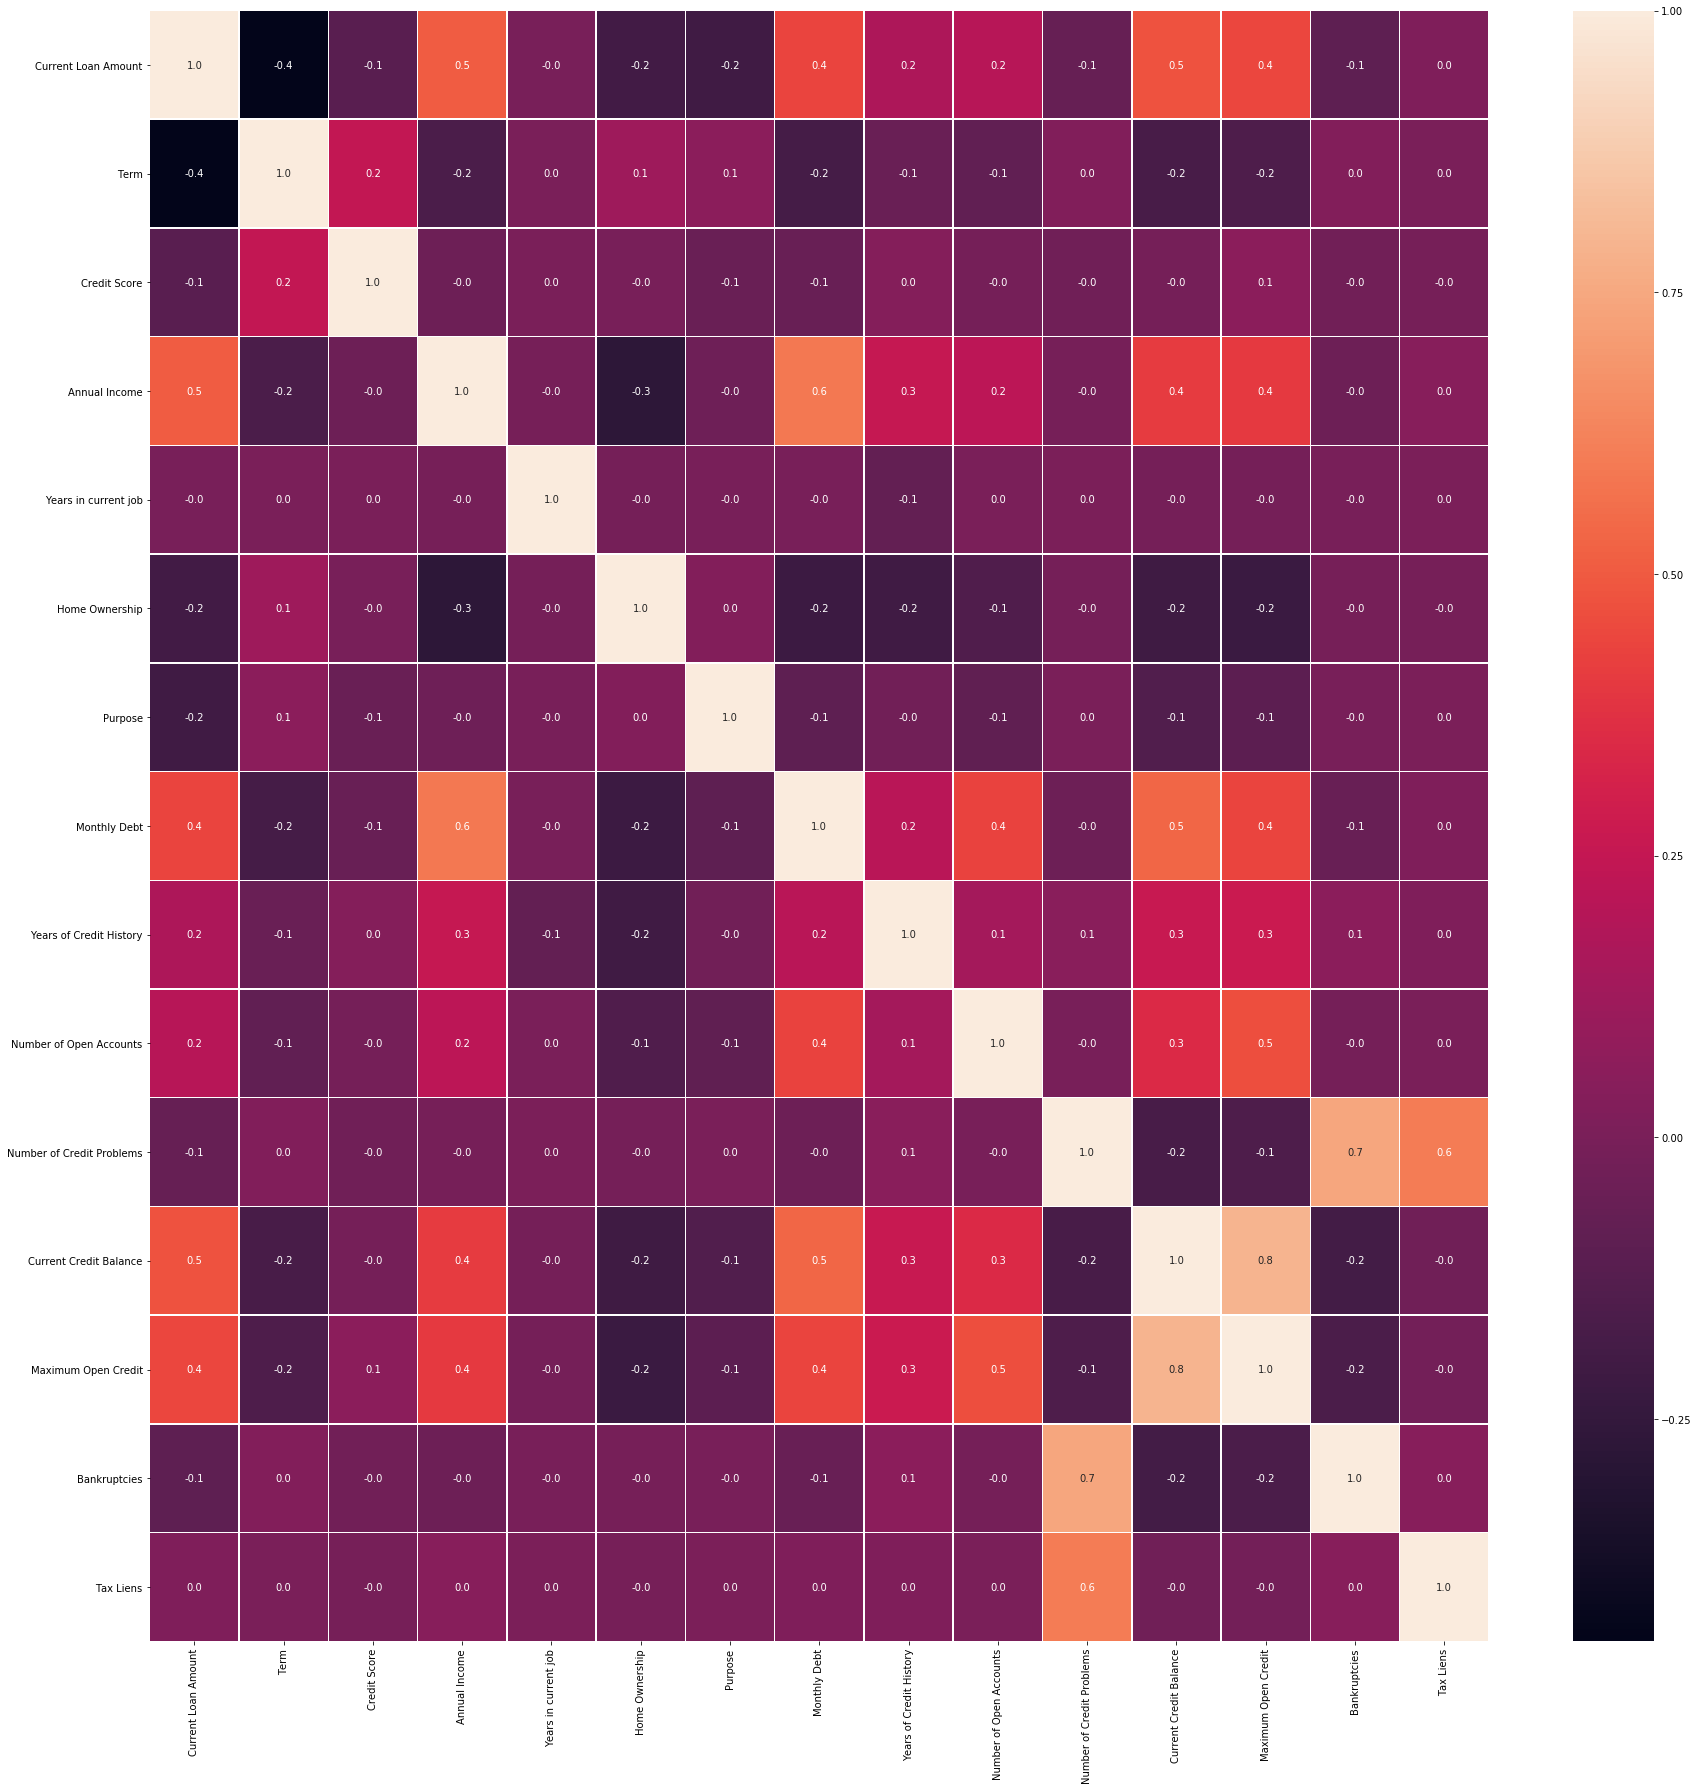

In [28]:
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(X_train_corr.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

> Coorelation maps like these are very powerful visualization tools, they allow for high level decisions on hyperparameter tuning. This heat map in particular shows how the "**Term Length**" of a loan is _negatively_ coorelated with the "**Loan Status**" while "**Annual Income**" is one of the most _positively_ coorelated independant variable with "**Loan Status**"

In [29]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Humberto Basurto\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Fitting data to Random Forest Algorithm

In [31]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Creating the predictor

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Using Confusion Matrix to test Algorithm 

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
#checking Confusion Matrix for model accuracy
cm

array([[1002, 2235],
       [ 166, 9846]], dtype=int64)

### <cener>81% accuracy and above 75th percentile, good result<center>
>No hyperparameter tuning, it is possible to narrow down accuracy to 90+ with proper hyperparameter tuning, using different algorithms, pipelines and statistical functions but that is something that is outside the scope of this project. 
    
>I used a small dataset and simple and effective algorithm due to cpu ram limitations. Project primarily focuses on analysis of loan data using python statistical libraries and Random Forest Classifier. 

#### Major challenges for the project:
- Lack of information on loan data origin
- Extensive amount of missing values
- Amount of variables made it hard to visualize algorithm results

#### Some conclusions I arrived to while working on this project
- Customers with larger income and shorter loan length are most likely to pay off loan in full
- A majority of Customers are able and do pay off loan eventually
- Data focuses mainly on customer information, there is little data on type of loan and details thereof. 
- More data such as customer job industry, home location, education, sex, age etc. would allow for deeper understanding of type of customer able to pay off loans and advertising that should be made to appeal to that type of customer.
- More data on how and where the customer gets loan, how they pay, how often they communicate with company and customer surveys would further help map customer activity and facilitate lending to ideal customers
